In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('extra/train_data.csv')
train_data.head(5)

,timestamp,question_1,question_2,question_3,question_4,question_5,is_relevant,object,is_positive
0,2024-04-01 08:30:00,Основы программирования,Интерактивный подход к изучению основ C# был о...,Нет.,Увеличить количество практических заданий для ...,Введение в разработку на .NET Framework.,1,0,1
1,2024-04-01 10:00:00,Основы программирования,Подробное объяснение логических операторов в J...,Нет.,Предоставить ещё больше практических задач пос...,Детальное изучение асинхронного программирован...,1,0,1
2,2024-04-01 15:00:00,Основы программирования,Введение в программирование на Python было про...,Нет.,"Улучшить качество видеоматериалов, иногда было...",Библиотеки Python для анализа данных и машинно...,1,0,1
3,2024-04-01 17:00:00,Основы программирования,"Понятное изложение основных понятий, хорошая с...","Да, циклы for и while были объяснены слишком б...",Добавить видеоматериалы для самостоятельного и...,Функциональное программирование.,1,0,1
4,2024-04-02 09:00:00,Основы программирования,Кларность и структура материала по основам Jav...,Нет.,Ввести больше примеров на работу с массивами и...,Работа с асинхронным кодом в JavaScript.,1,0,1


C:\Users\grand\AppData\Local\Temp\ipykernel_7140\282085706.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  output_data.loc[output_data['question_1'] == lesson_name, column] = output_data.loc[output_data['question_1'] == lesson_name, column].astype("str")
C:\Users\grand\AppData\Local\Temp\ipykernel_7140\282085706.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '1']' has dtype incompatible with int64, 



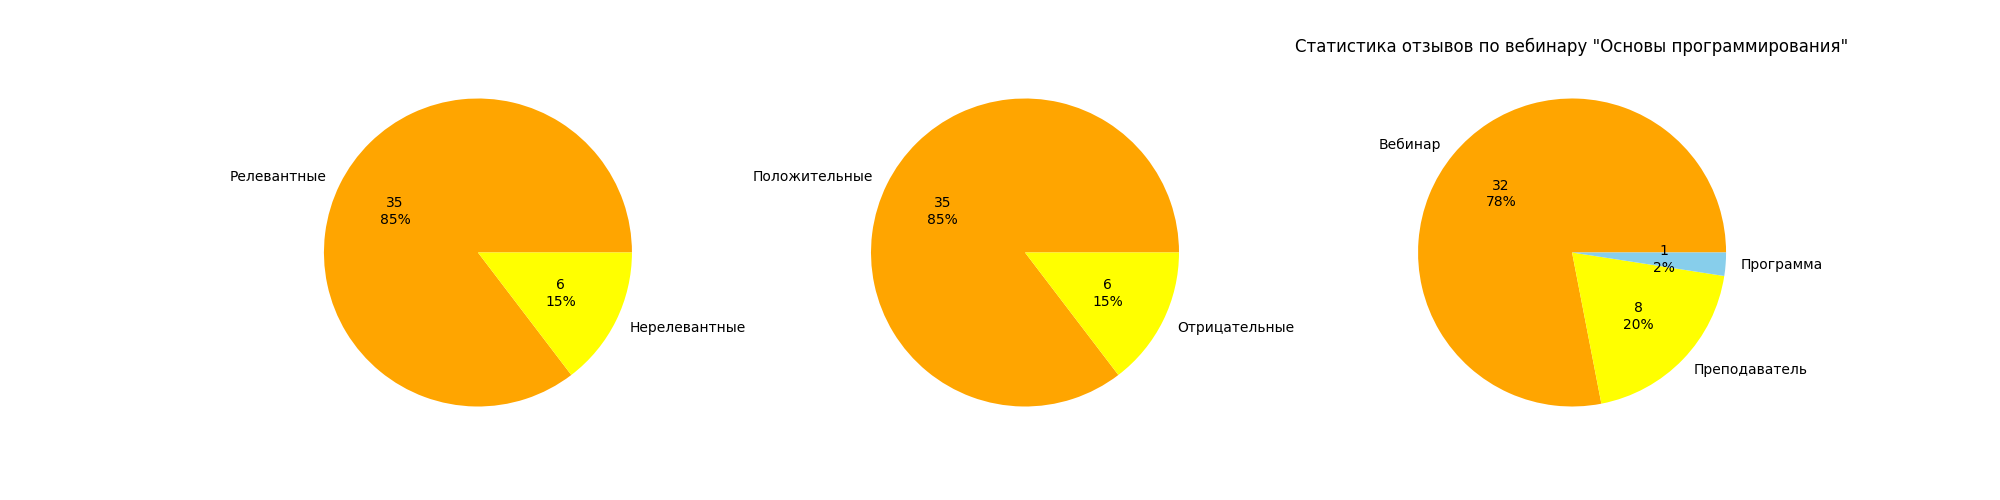
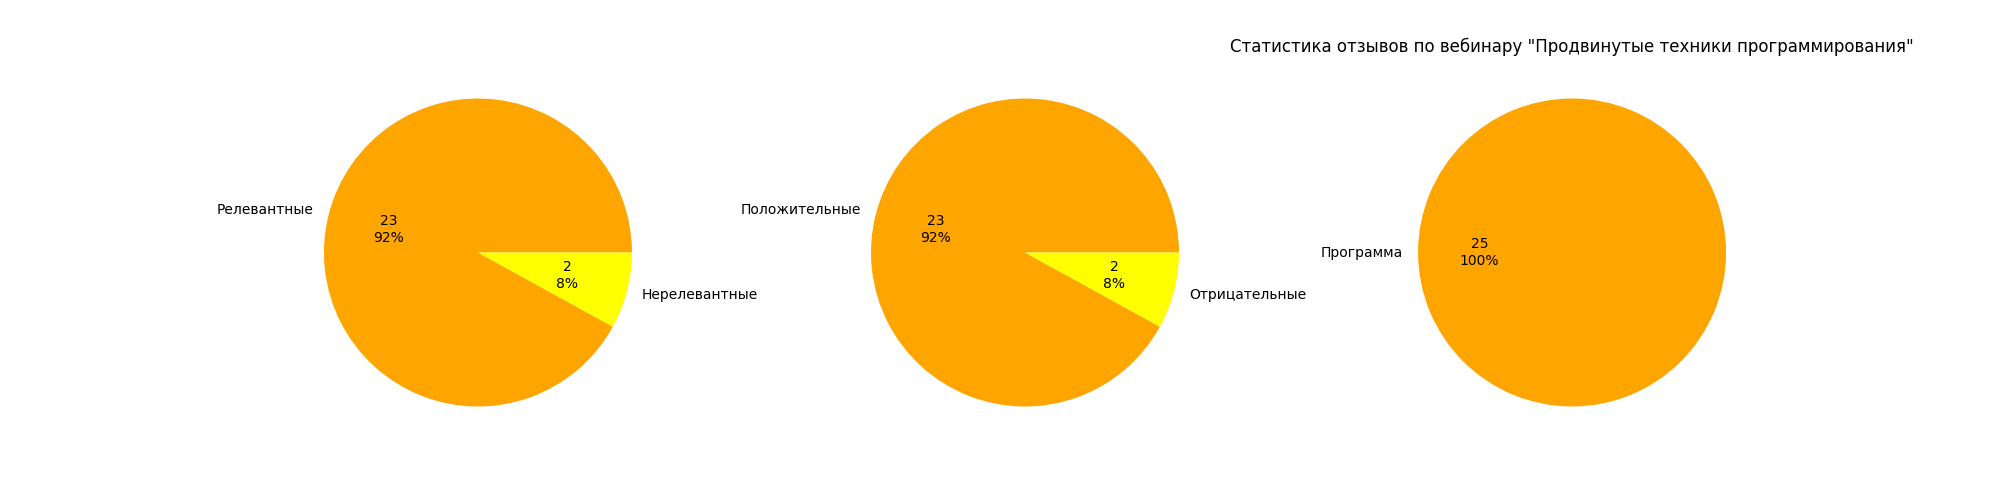
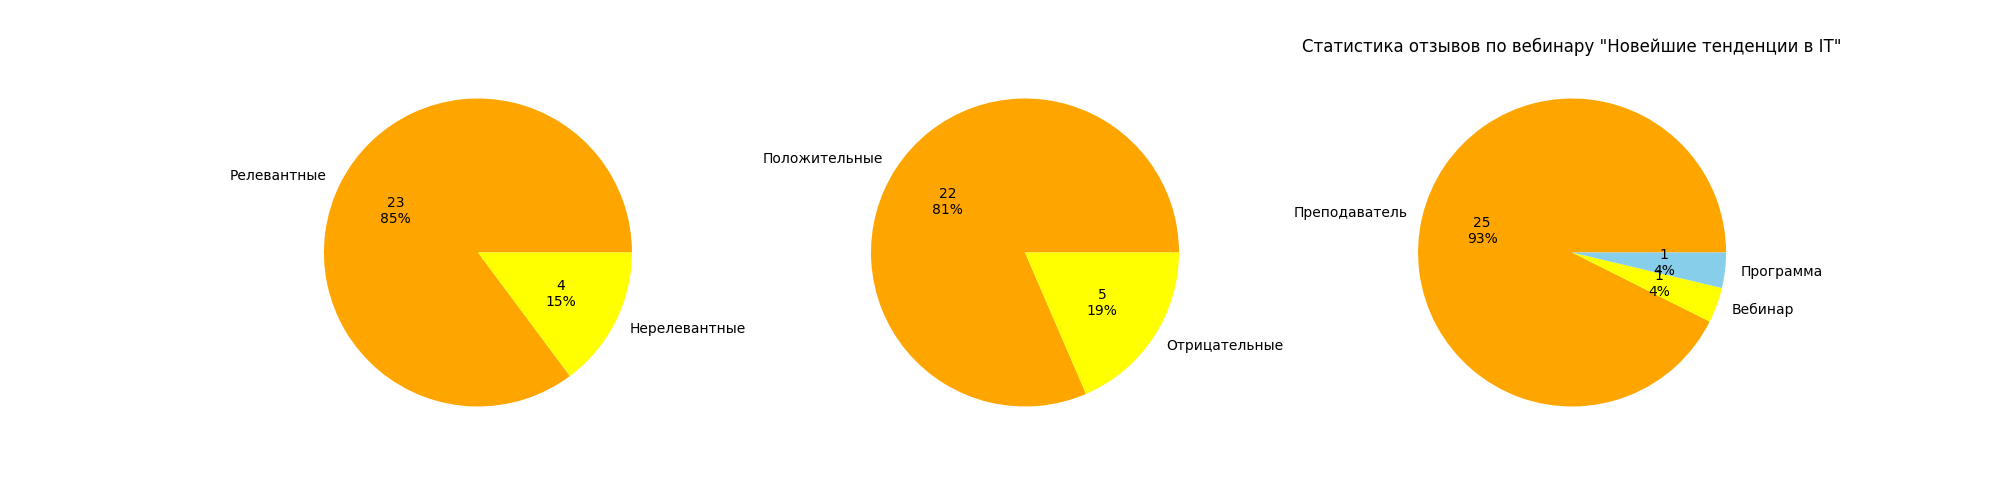
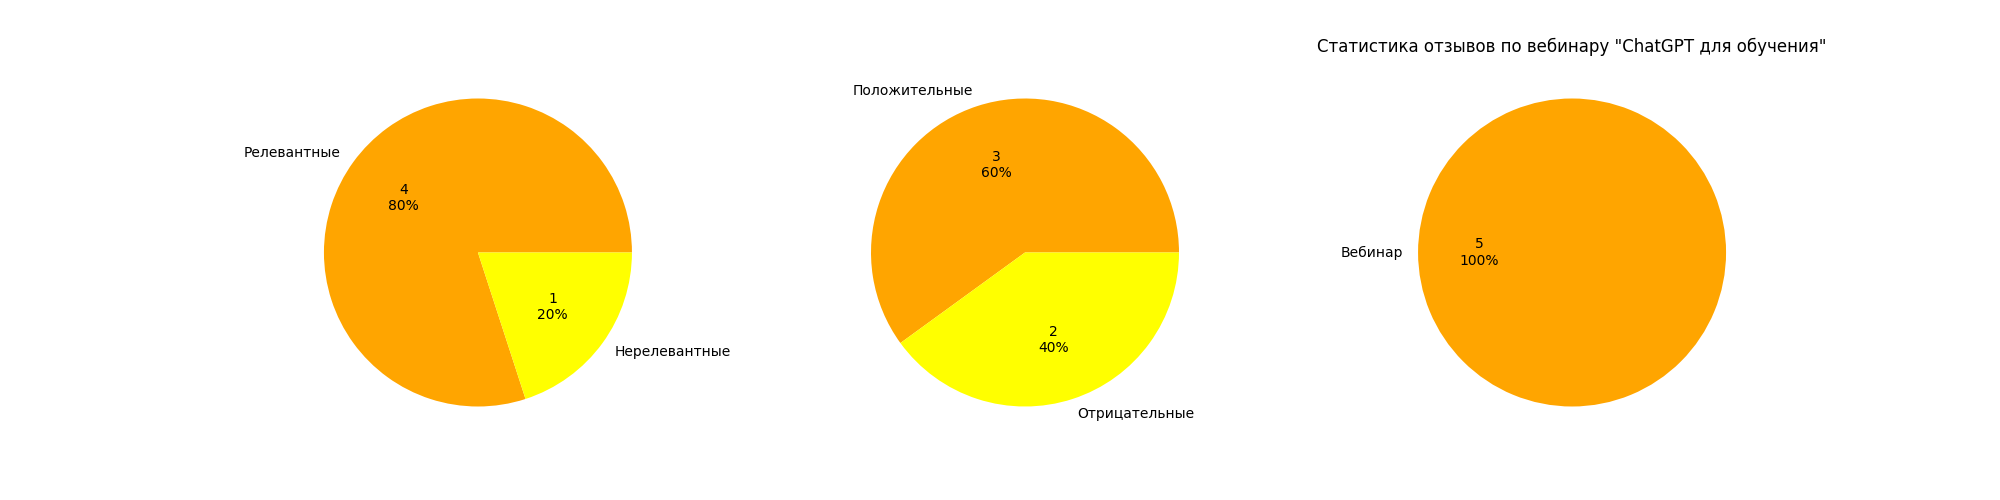
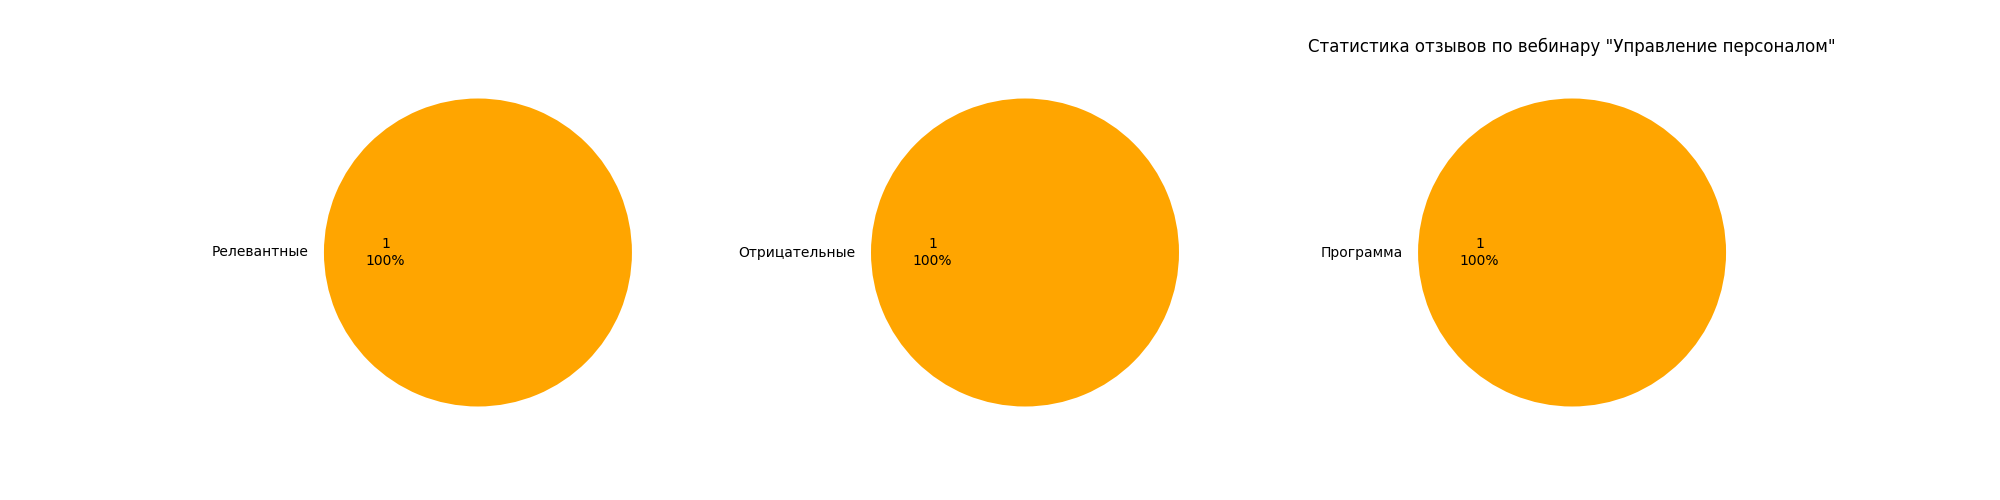
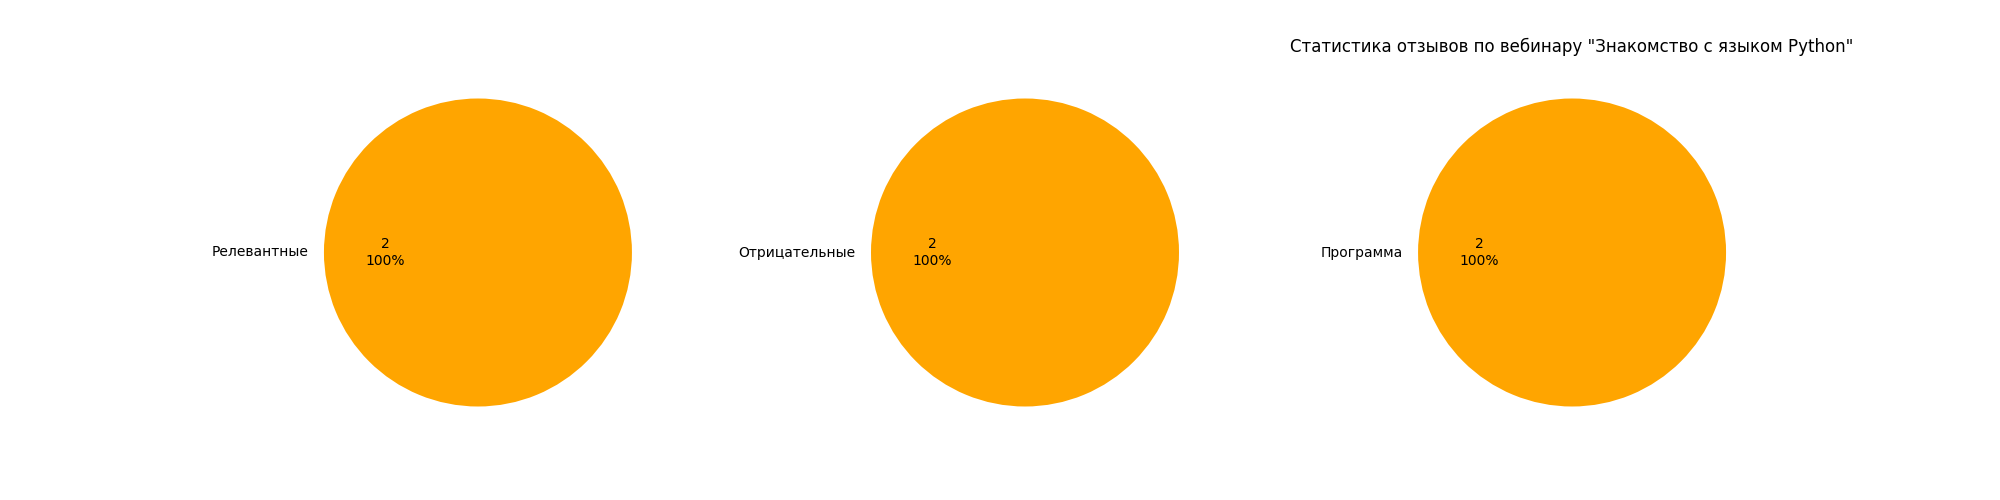
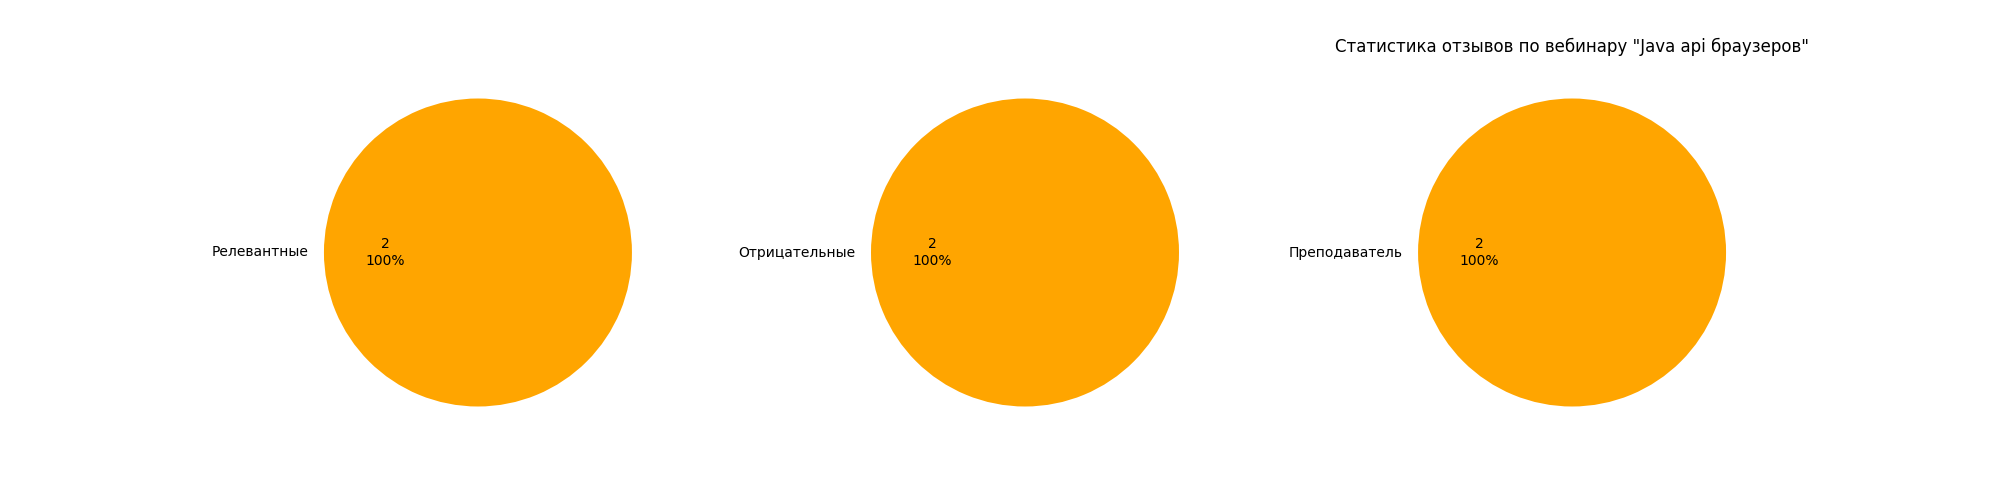

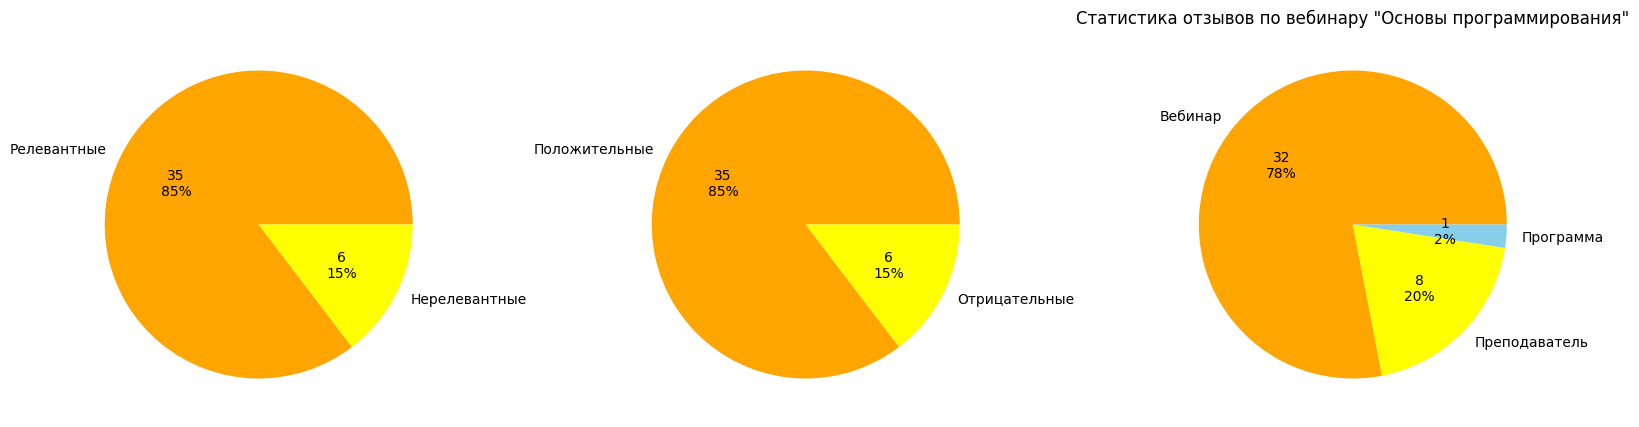

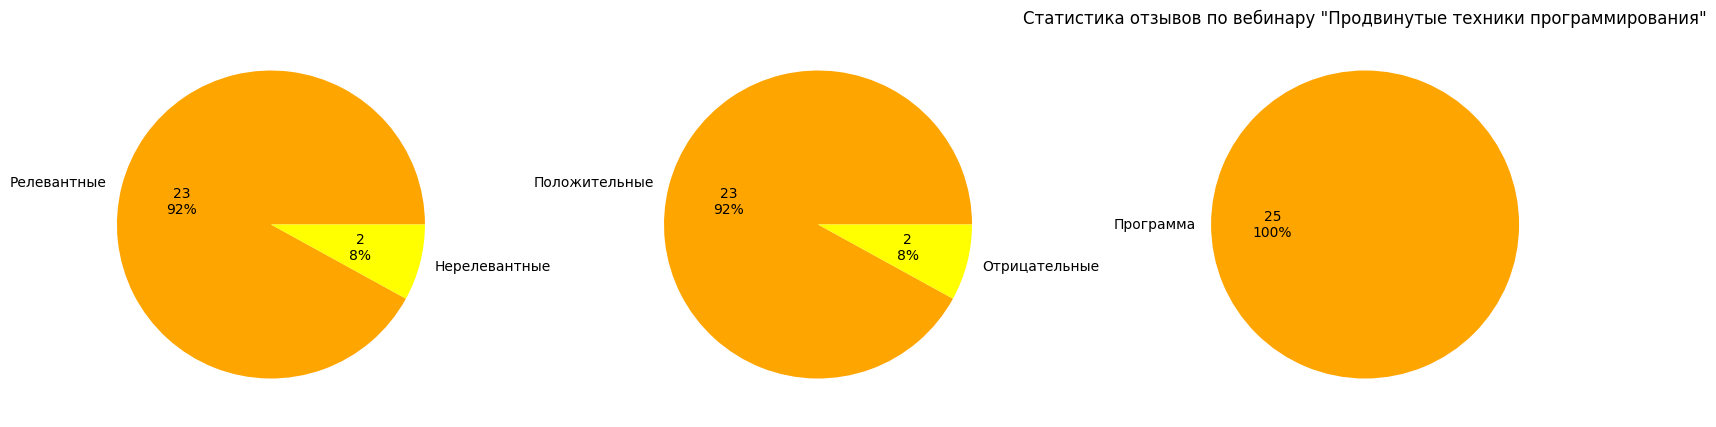

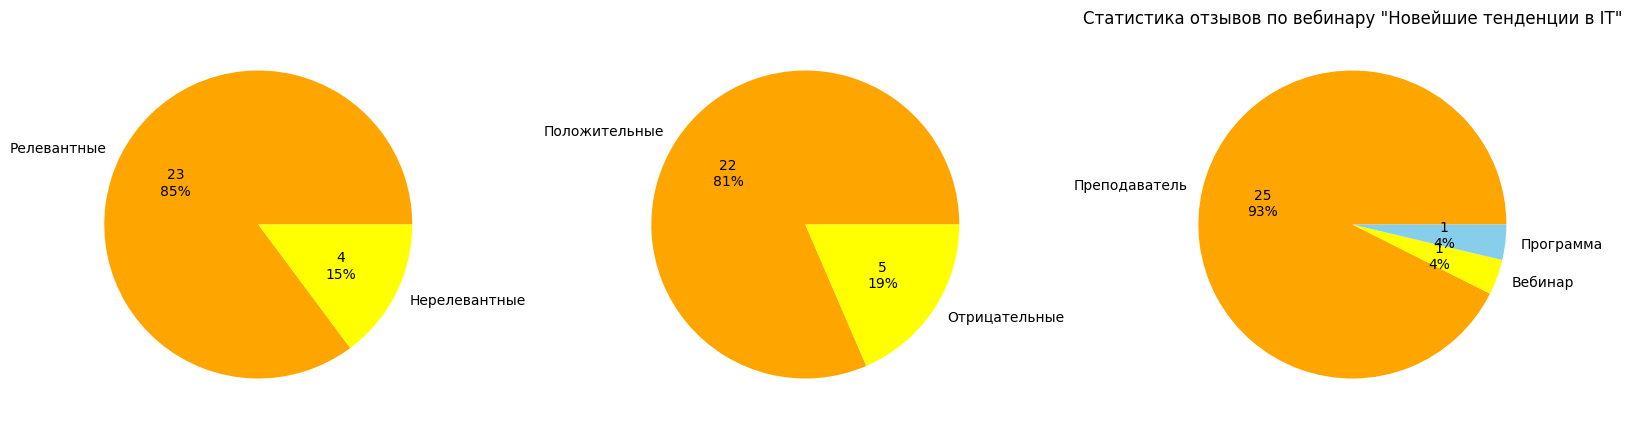

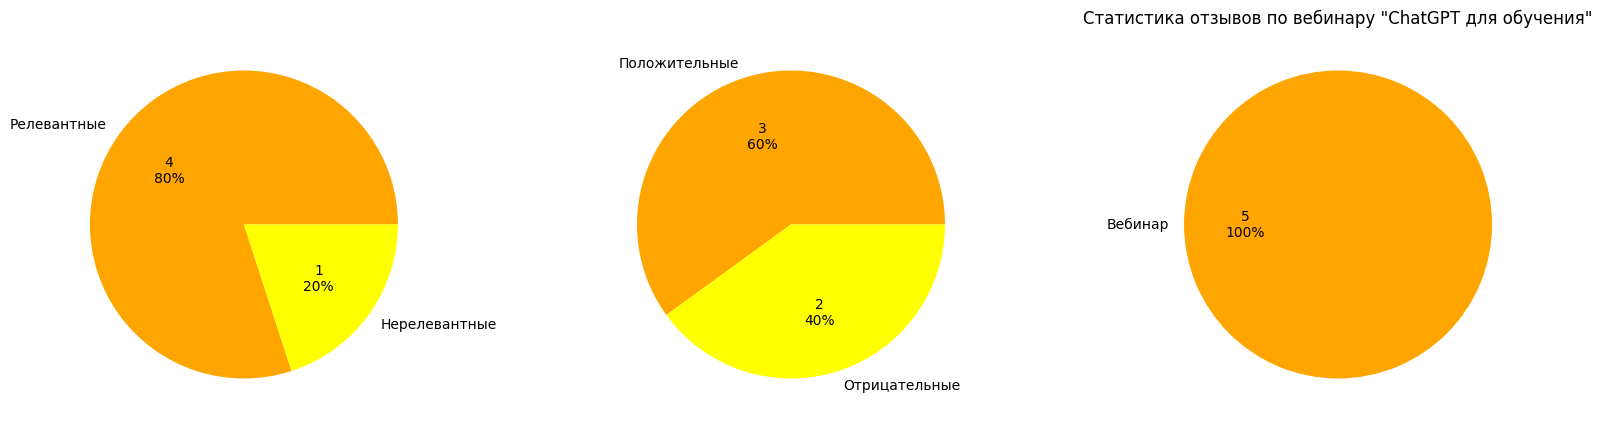

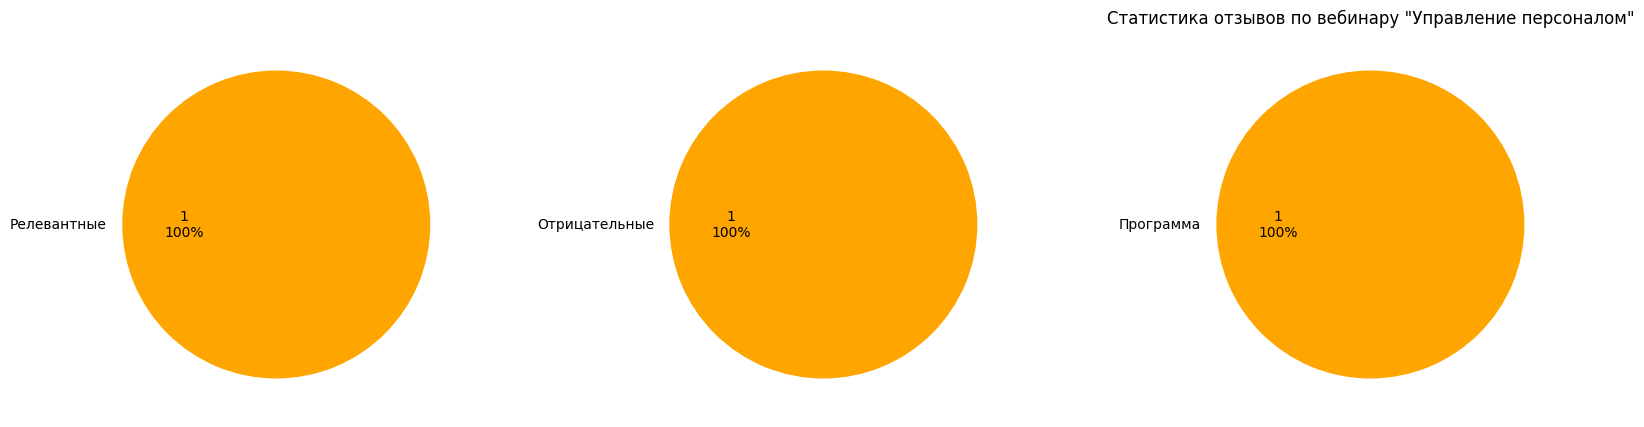

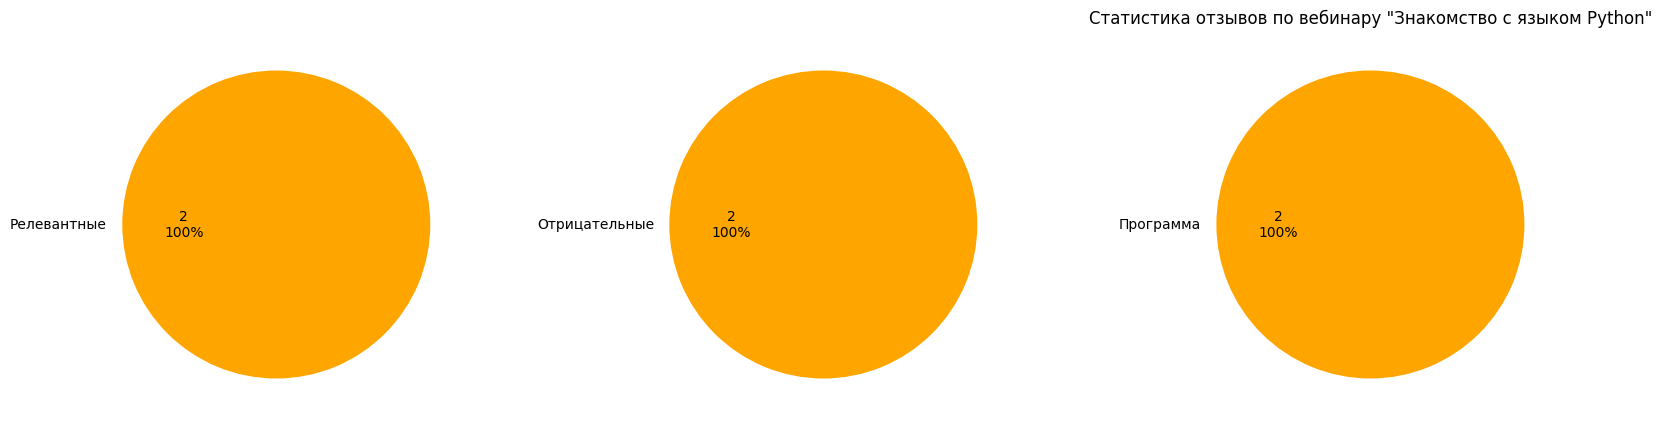

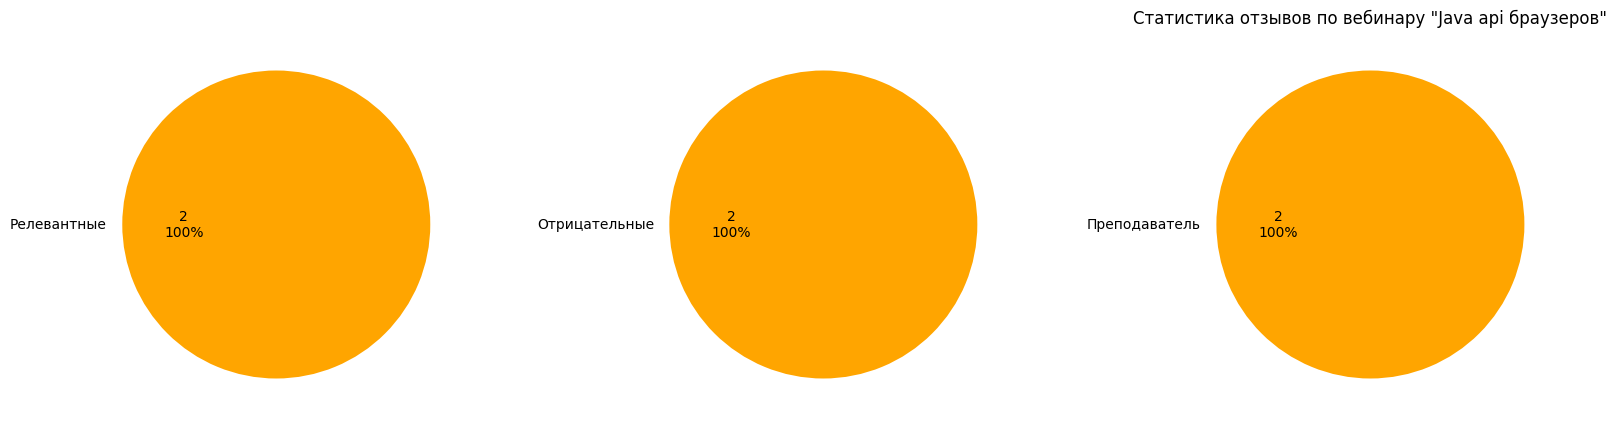

In [74]:
import base64
from io import BytesIO

columns = {'is_relevant': ['Нерелевантные', 'Релевантные'],
           'is_positive': ['Отрицательные', 'Положительные'],
           'object': ['Вебинар', 'Программа', 'Преподаватель']}
output_data = train_data[list(columns.keys()) + ['question_1']].copy()


def label_function(val):
    return f'{val / 100 * len(train_data[columns.keys()]):.0f}\n{val:.0f}%'


def lesson_stats(lesson_name: str) -> str:
    for column in columns.keys():
        output_data.loc[output_data['question_1'] == lesson_name, column] = output_data.loc[output_data['question_1'] == lesson_name, column].astype("str")
        output_data.loc[output_data['question_1'] == lesson_name, column] = output_data.loc[output_data['question_1'] == lesson_name, column].replace(list(map(str, range(len(columns[column])))), columns[column])
    
    fig, axes = plt.subplots(ncols=len(columns), figsize=(20, 5))
    plt.title(f'Статистика отзывов по вебинару "{lesson_name}"')
    for column_name, ax in zip(columns.keys(), axes):
        lesson_df = output_data.loc[output_data['question_1'] == lesson_name, column_name]
        (lesson_df.value_counts().plot(kind='pie',
                              autopct=lambda val: f'{val / 100 * len(lesson_df):.0f}\n{val:.0f}%',
                              textprops={'fontsize': 10},
                              colors=['orange', 'yellow', 'skyblue'], ax=ax))
        ax.set_ylabel('', size=11)
    buf = BytesIO()
    plt.savefig(buf, format="png")
    # Embed the result in the html output.
    data = base64.b64encode(buf.getbuffer()).decode("ascii")
    return f"<img src='data:image/png;base64,{data}'/>"

result_str = ""
for lesson in train_data['question_1'].unique():
    result_str += lesson_stats(lesson)
print(result_str)